## Setup

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# General
from glob import glob
import numpy as np
import pandas as pd

# Machine Learning
from sklearn.metrics import roc_auc_score

# Deep Learning
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K

# Plotting
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns


## PARAMS

In [2]:
INPUT_DIR = "../input/g2net-gravitational-wave-detection"

In [3]:
# Load model
model = keras.models.load_model("model1.h5")
# load training set
train_x = np.load(f"{INPUT_DIR}/train_x.npy")
train_y = np.load(f"{INPUT_DIR}/train_y.npy")


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3090, compute capability 8.6


In [4]:
def batchwise_prediction(ds, batches = 8):
    batch_size = ds.shape[0] // batches
    results = np.zeros(ds.shape[0], dtype=np.float32)
    for i in range (batches):
        print(i)
        rng = range(i * batch_size, (i+1)* batch_size)
        results[rng] = model.predict(ds[rng])[:,0]
        
    return results
results = batchwise_prediction(train_x)

0
1
2
3
4
5
6
7


In [14]:
results[np.isnan(results)] = 1

In [15]:
roc_auc_score(train_y, results)

0.8365209452863855

C:\Users\apist\anaconda3\envs\g2net-tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

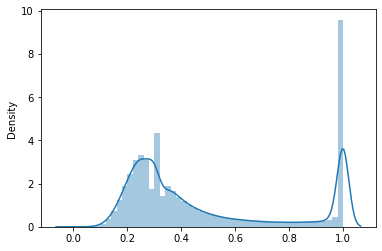

In [16]:
sns.distplot(results)

NameError: name 'result' is not defined

In [37]:
K.clear_session()

In [18]:
test_x = np.load(f"{INPUT_DIR}/test_x.npy")
test_x.shape
results_test = batchwise_prediction(test_x, 4)

0
1
2
3


In [19]:
roc_auc_score(train_y, results)

0.8365209452863855

In [33]:
sub = pd.read_csv(f"{INPUT_DIR}/sample_submission.csv")
sub.target = results_test


In [32]:
# results_test[np.isnan(results_test)] = 1
results.max()

1.0

In [34]:
sub.to_csv("submission1.csv", index=False)